In [244]:
#Importation des modules
import numpy as np 
import matplotlib.pyplot as plt
import os 
import cv2 
import random

In [245]:
#Chargement du datasets : https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
#On va maintenant mettre en forme les données
#Creating data ou Img_Size est la taille des images converties

def creating_data(Img_Size):
    Datas = []
    DATADIR = 'PetImages'
    Categories = ['Dog', 'Cat']
    for category in Categories : 
        path = os.path.join(DATADIR, category) #Chemin jusqu'au dossier qui contient des chiens ou des chats
        class_num = Categories.index(category) #0 pour les chiens et 1 pour les chats
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (Img_Size, Img_Size))
                Datas.append([img_array, class_num])
            except Exception as e : 
                pass
    random.shuffle(Datas)
    return Datas 
            
        
        
    



In [246]:
Datas = creating_data(48)
random.shuffle(Datas)

In [247]:
# Préparer les données et les séparer 
# Conversion en Tableau Numpy et séparation entre train et test set selon le Split_ratio

def prepare_data() : 
    X, y = [], []
    for el in Datas : 
        X.append(el[0])
        y.append(el[1])
    X = np.array(X)
    X = X/255
    X = X.reshape(X.shape[0],-1)
    y = np.array(y)
    return X, y


        

In [248]:
X, y = prepare_data()
print(X)

[[0.44705882 0.36470588 0.27058824 ... 0.25098039 0.09019608 0.09803922]
 [0.54509804 0.41960784 0.42745098 ... 0.19607843 0.09803922 0.16078431]
 [0.63137255 0.63529412 0.61568627 ... 0.58039216 0.60784314 0.71764706]
 ...
 [0.74509804 0.72941176 0.70980392 ... 0.93333333 0.96078431 0.92156863]
 [0.03921569 0.04313725 0.07843137 ... 0.23137255 0.23529412 0.24705882]
 [0.97647059 0.97647059 0.98431373 ... 0.43921569 0.42352941 0.41960784]]


In [249]:
def split_data(X, y, train_ratio):
    s = int(X.shape[0]*train_ratio)
    X_train = X[:s]
    y_train = y[:s]
    X_test = X[s:]
    y_test = y[s:]
    return X_train, y_train, X_test, y_test

In [250]:
X_train, y_train, X_test, y_test = split_data(X, y, 0.8)

In [251]:
print(X_train.shape)
print(X_train)

(19956, 2304)
[[0.44705882 0.36470588 0.27058824 ... 0.25098039 0.09019608 0.09803922]
 [0.54509804 0.41960784 0.42745098 ... 0.19607843 0.09803922 0.16078431]
 [0.63137255 0.63529412 0.61568627 ... 0.58039216 0.60784314 0.71764706]
 ...
 [0.3372549  0.6745098  0.30588235 ... 0.71764706 0.72941176 0.7254902 ]
 [0.79215686 0.78823529 0.78039216 ... 0.71372549 0.71372549 0.7372549 ]
 [0.51372549 0.89803922 0.74901961 ... 0.98823529 0.99215686 0.99607843]]


In [252]:
#Les données sont préparées, nous pouvons maintenant créer notre premier neurone : 
#On commence par un neurone. Il nous faut une fonction init() qui initialise de manière random W et b : 
def init(X):
    W = np.random.randn(X.shape[1])
    b = np.random.randn(1)
    return W, b

In [253]:
#On calcule maintenant le feed_forward du neurone : a(XW + b)
def feed_forward(X,W,b) : 
    Z = X.dot(W) + b
    A = 1/(1+np.exp(-Z))
    return A

In [254]:
# On calcul le log_loss 
# Attention, on passe au modèle une matrice X qui contient toutes les images : il faut diviser par la taille du dataset !
#On ajoute un nombre très petit dans les logarithme pour éviter les 0 qui causeraient des erreurs
epsilon = 1*10**(-15)
def log_loss(A, y) :
    return (1/len(y)) * (np.sum(-y*np.log(A+epsilon) - (1-y)*np.log(1-A+epsilon)))

In [255]:
#On calcul le gradient avec la formule donnée

def gradients(A,X,y) :
    dW = (1/len(y)) * np.dot(X.T, (A-y))
    db = (1/len(y))*np.sum(A-y)
    return (dW, db)

In [256]:
def update (dW, db, W, b, learning_rate):
    W -= learning_rate*dW
    b -= learning_rate*db
    return (W, b)

In [257]:
def predict(X,W,b): 
    A = feed_forward(X,W,b)
    return A>0.5

In [258]:
from sklearn.metrics import accuracy_score
def train(X, y, learning_rate, nb_epochs):
    W, b = init(X)
    History = []
    accuracy = []
    for i in range(nb_epochs):
        A = feed_forward(X, W, b)
        History.append(log_loss(A,y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        y_pred = predict(X, W, b)

        accuracy.append(accuracy_score(y,y_pred))
    return(accuracy,History,W, b)

In [259]:
acc, hist, W, b = train(X_train,y_train, 0.01, 1000)

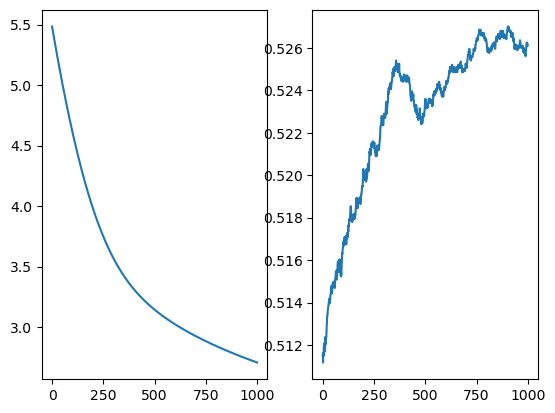

In [260]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(hist)
plt.subplot(1,2,2)
plt.plot(acc)

In [261]:
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.reshape((1,y_train.shape[0])), y_test.reshape((1,y_test.shape[0]))

In [262]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [263]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [264]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [265]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [266]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [267]:
import tqdm

In [285]:
def neural_network(X, y,X_test,y_test, n1=100, learning_rate = 0.1, n_iter = 10000):


    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    history = []


    for i in range(n_iter):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']
        test_activations = forward_propagation(X_test, parametres)
        A2_test = test_activations['A2']
        
        if (i%10 == 0):
            train_loss.append(log_loss(y.flatten(), A2.flatten()))
            test_loss.append(log_loss(y_test.flatten(),A2_test.flatten()))
            y_pred = predict(X, parametres)
            y_test_pred = predict(X_test, parametres)
            train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
            test_acc.append(accuracy_score(y_test.flatten(),y_test_pred.flatten()))
        
            history.append([parametres.copy(), train_loss, train_acc,test_loss, test_acc, i])


        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    return parametres, train_loss, train_acc, test_loss, test_acc

In [290]:
parametres, train_loss, train_acc, test_loss, test_acc = neural_network(X_train, y_train,X_test, y_test, n1=32)
plt.figure()
plt.subplot(1,2,1)
plt.plot(train_loss)
plt.xlabel("epochs")
plt.ylabel("train_loss")
plt.plot(test_loss)
plt.subplot(1,2,2)
plt.plot(train_acc)
plt.plot(test_acc)

KeyboardInterrupt: 

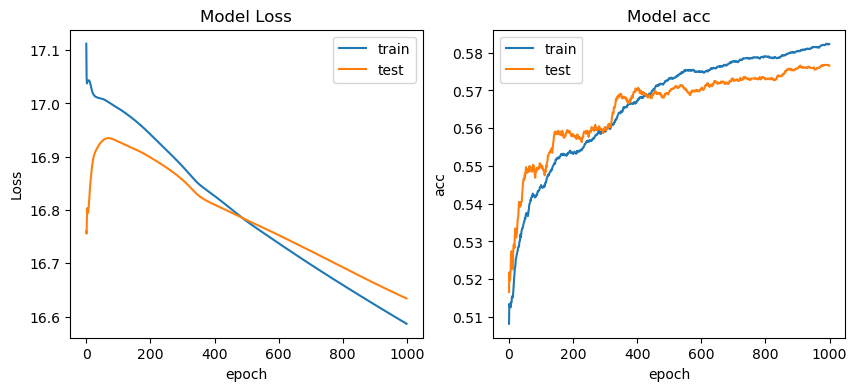

In [308]:
fig, axis = plt.subplots(1,2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(train_loss)
axis[0].plot(test_loss)
axis[0].set_title('Model Loss')
axis[0].set_ylabel('Loss')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(train_acc)
axis[1].plot(test_acc)
axis[1].set_title('Model acc')
axis[1].set_ylabel('acc')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 4)